# Problem

Household Power prediction

## About

This is a time series problem where we need to forecast power consumption  based on past consumption of power in household. 

In [1]:
# -*- coding: utf-8 -*-

This code is for perdiction cumsumption of household power.
Data: household power cunsumption data
Models: many models are used to get comparesion between them.


#Copyright@ H2HDATA

The entire prcess occurs in seven stages-
1. DATA INGESTION
2. DATA ANALYSIS 
3. DATA MUNGING
4. DATA EXPLORATION
5. DATA MODELING
6. HYPER-PARAMETERS OPTIMIZATION
7. PREDICTION
8. VISUAL ANALYSIS
9. RESULTS


Used library
1. pandas
2. numpy
3. time
4. sklearn
5. matplotlib
6. statsmodels



In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error as mse
import model
import helper

/usr/lib64/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Data Ingestion

In [3]:
data = helper.read_data()

/usr/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
data.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


## Data Description

Data Description
columns
1. <b>Date</b>: Date in format dd/mm/yyyy
2. <b>Time</b>: Time in format hh:mm:ss
3. <b>Global_active_power</b>: Household global minute-averaged active power (in kilowatt). Global active power is the power consumed by appliances other than the appliances mapped to Sub Meters. Global active power is the real power consumption i.e. the power consumed by electrical appliances other than the sub metered appliances.It is basically called wattfull power.
4. <b>Global_reactive_power</b>: Household global minute-averaged reactive power (in kilowatt). Global reactive power is the power which bounces back and froth without any usage or leakage. It is the imaginary power consumption. It is basically called wattless power.
6. <b>Voltage</b>:  Minute-averaged voltage (in volt)
7. <b>Global_intensity</b>: Household global minute-averaged current intensity (in ampere).  Intensity is magnitude of the power consumed. Also called as strength of current.
8. <b>Sub_metering_1</b>:  Energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
9. <b>Sub_metering_2</b>: Energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
10. <b>Sub_metering_3</b>: Energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## Data Munging

In [6]:
data.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Only Sub_metering_3 is described which implies other coloum to be of object type. First task is to make all column numeric except date and time and later we will do data analysis.

In [7]:
cols = data.columns
cols

Index([u'Date', u'Time', u'Global_active_power', u'Global_reactive_power',
       u'Voltage', u'Global_intensity', u'Sub_metering_1', u'Sub_metering_2',
       u'Sub_metering_3'],
      dtype='object')

In [8]:
for col in cols[2:]:
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0.0).astype(float)

In [9]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [9]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')
data['Time'] = data['Time'].dt.time
x =  data['Time']
data['DateTime'] = data.apply(lambda r : pd.datetime.combine(r['Date'],r['Time']),1)

In [10]:
data['DateTime'].head()

0   2006-12-16 17:24:00
1   2006-12-16 17:25:00
2   2006-12-16 17:26:00
3   2006-12-16 17:27:00
4   2006-12-16 17:28:00
Name: DateTime, dtype: datetime64[ns]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
Date                     datetime64[ns]
Time                     object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
DateTime                 datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(1)
memory usage: 158.3+ MB


## Data Analysis

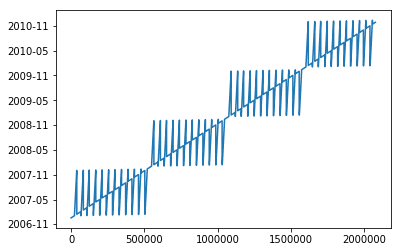

In [12]:
plt.plot(data['DateTime'])
plt.show()

From above It seen that data has porperly interval and so satisfy basic requirment for timeseries modeling.

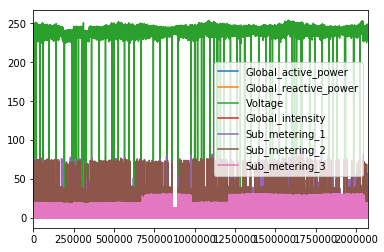

In [14]:
data.plot()
plt.show()

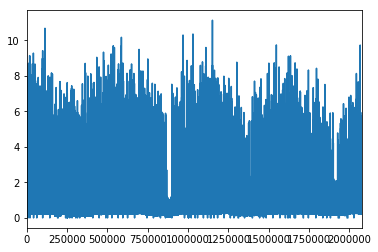

In [15]:
data['Global_active_power'].plot()
plt.show()

In [16]:
a = data[data['Date'] == '18/12/2006'][0:1].index[0] 
b = data[data['Date'] == '25/12/2006'][0:1].index[0]
c = data[data['Date'] == '1/1/2007'][0:1].index[0]
d = data[data['Date'] == '8/1/2007'][0:1].index[0]
e = data[data['Date'] == '15/1/2007'][0:1].index[0]
f = data[data['Date'] == '22/1/2007'][0:1].index[0]

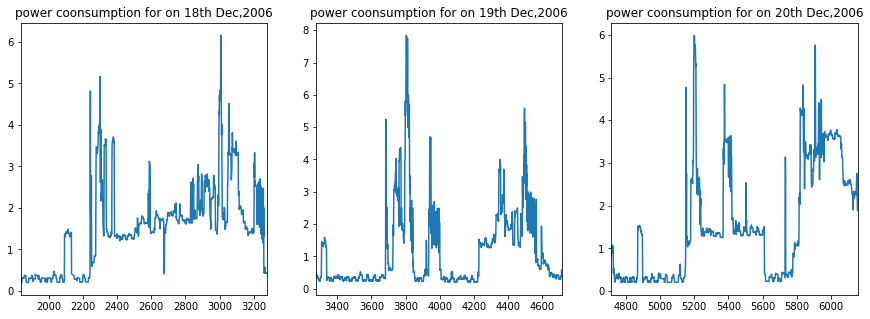

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
data[data['Date'] == '18/12/2006']['Global_active_power'].plot()
plt.title('power coonsumption for on 18th Dec,2006')
plt.subplot(1,3,2)
data[data['Date'] == '19/12/2006']['Global_active_power'].plot()
plt.title('power coonsumption for on 19th Dec,2006')
plt.subplot(1,3,3)
data[data['Date'] == '20/12/2006']['Global_active_power'].plot()
plt.title('power coonsumption for on 20th Dec,2006')
plt.show()

Here, we can see that power used is very less from mid night to early morning. While for all 3 days Its high in evevning and at night. For early evening its having mixed behavior. 

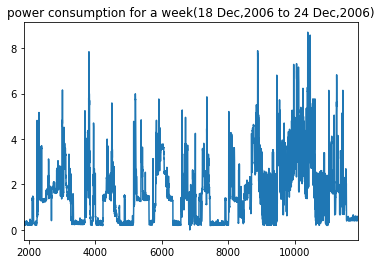

In [18]:
data['Global_active_power'][a:b].plot()
plt.title('power consumption for a week(18 Dec,2006 to 24 Dec,2006)')
plt.show()

Here, we can see that for week ending power is utilized most, while rest its having constant behavior of more usage in day time. 

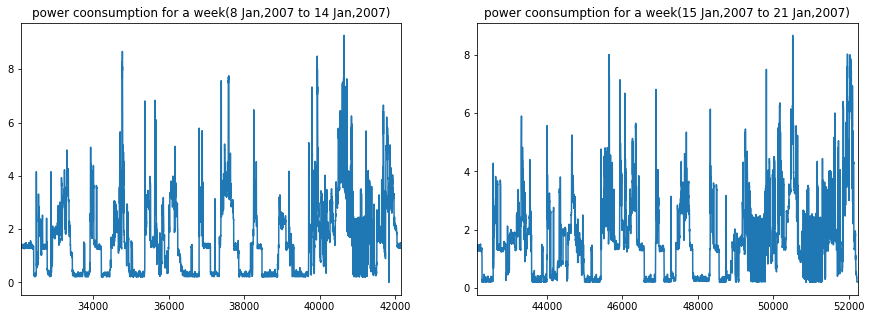

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data['Global_active_power'][d:e].plot()
plt.title('power coonsumption for a week(8 Jan,2007 to 14 Jan,2007)')
plt.subplot(1,2,2)
data['Global_active_power'][e:f].plot()
plt.title('power coonsumption for a week(15 Jan,2007 to 21 Jan,2007)')
plt.show()

As previous plot here, we can see that for week ending power is utilized most, while rest its having constant behavior of more usage in day time. 

### Sub-metering
The dataset includes measures about specific energy uses, and it’d be interesting to see exactly what appliances are being used at different times. The documentation identifies the following variables of interest:
1.  sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

2.  sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

3.  sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


In [20]:
data_submeter = data[['Sub_metering_1','Sub_metering_2' ,'Sub_metering_3']]

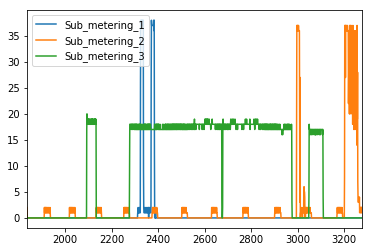

In [21]:
data[data['Date'] == '18/12/2006'][['Sub_metering_1','Sub_metering_2' ,'Sub_metering_3']].plot()
plt.show()

Here, we can see that kitchen electricity usage is pretty high in morning. By contrast, people seem to use their laundry rooms at evening and night. Electric water heating and air-conditioning appear to have more uses during day time to late evening.

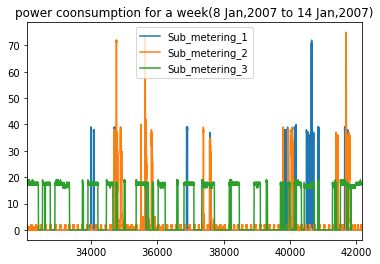

In [22]:
plt.figure()
data_submeter[d:e].plot()
plt.title('power coonsumption for a week(8 Jan,2007 to 14 Jan,2007)')
plt.show()

Here, we can see that kitchen electricity usage is pretty low on Thursdays with higher usage on Friday, Saturday, and Sunday which is end of a week . By contrast, people seem to use their laundry rooms on Tuesday, Wednesday, Saturday and on Sunday around noon. Electric water heating and air-conditioning appear to have highest usage during Friday evening, Saturday daytime, and Sunday day time.

## Data Exploration

In [ ]:
data.skew()

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
Date                     datetime64[ns]
Time                     object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
DateTime                 datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(1)
memory usage: 158.3+ MB


As data doesn't have outlier and missing value, so we will skip this step.

## Modeling

Here we are comaparing two model.
1. Basic model: Using only ARIMA model on active power.
2. Combined Model: This is combination of ARIMA and Linear Regression on all features.

### Basic Model

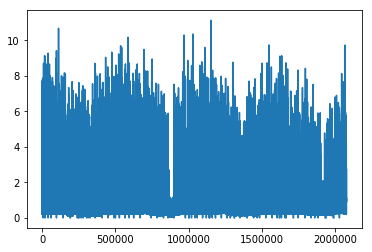

rolling mean: 0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11         4.343000
12         4.427000
13         4.419333
14         4.309333
15         4.142333
16         4.109333
17         4.101833
18         4.065500
19         4.067833
20         4.253333
21         4.590333
22         4.805167
23         4.785333
24         4.722833
25         4.554500
26         4.486333
27         4.473333
28         4.472333
29         4.451333
             ...   
2075229    1.024167
2075230    1.011500
2075231    1.004500
2075232    0.994667
2075233    0.985667
2075234    0.977500
2075235    0.974500
2075236    0.974833
2075237    0.977500
2075238    0.978167
2075239    0.978667
2075240    0.978667
2075241    0.978167
2075242    0.973167
2075243    0.969000
2075244    0.964667
2075245    0.962000
2075246    0.980500
207524

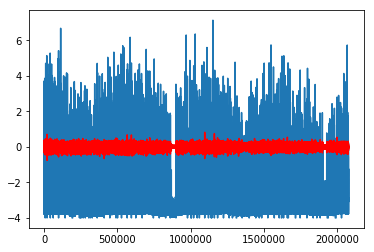

mean squared error 9.661833279541849


In [38]:
data_s = data
model.simple_models(data_s)

### Combined model

In [39]:
data.info()
model.combined_model(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
Date                     datetime64[ns]
Time                     object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
DateTime                 datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(1)
memory usage: 158.3+ MB
[0.418 0.436 0.498 ... 0.    0.    0.   ] dataframe
matric is singular : LinAlgError("Singular matrix") 
 cant run this model


/usr/lib64/python2.7/site-packages/pandas/core/ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)
